# 5. Etude sur MNIST

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from m2ds_deep_learning_2_project.utils import DNN, lire_MNIST, plot_grid

sns.set_style("white")

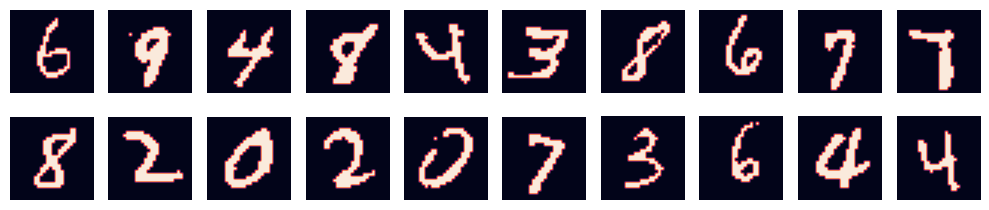

In [3]:
X_train, y_train = lire_MNIST("train")
X_test, y_test = lire_MNIST("test")
image_size = (28, 28)
plot_grid(X_train, image_size=image_size)

## 5.1. Nombre de couches

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

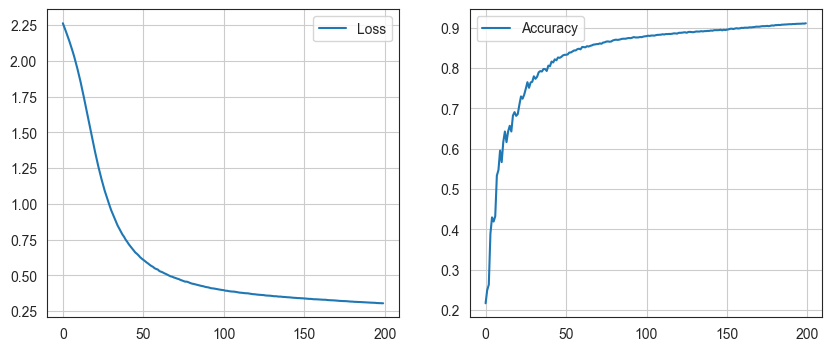

  0%|          | 0/200 [00:00<?, ?it/s]

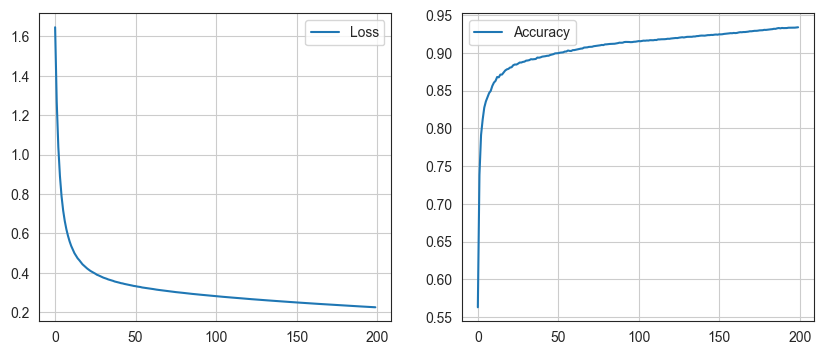

loss 0.3241 - acc 0.903 
loss 0.2513 - acc 0.928 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

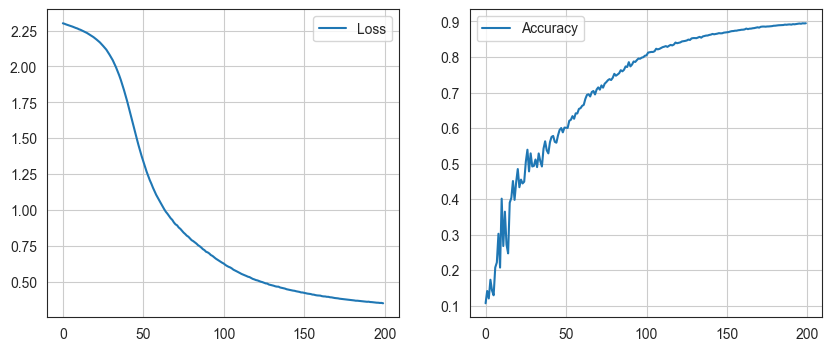

  0%|          | 0/200 [00:00<?, ?it/s]

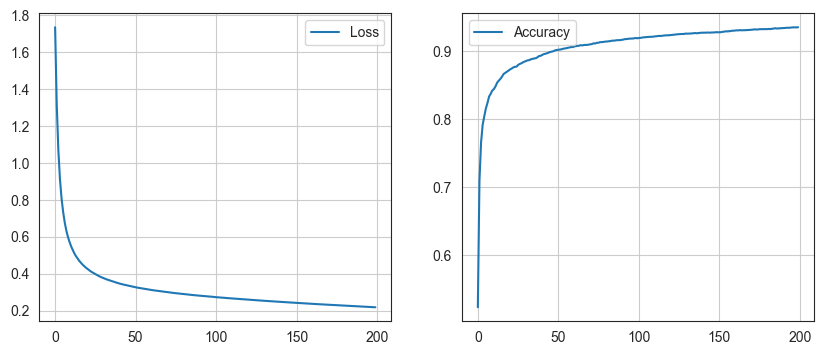

loss 0.3734 - acc 0.889 
loss 0.2494 - acc 0.930 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

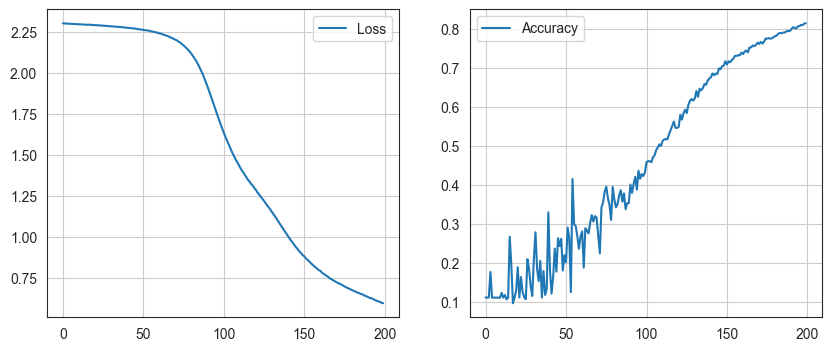

  0%|          | 0/200 [00:00<?, ?it/s]

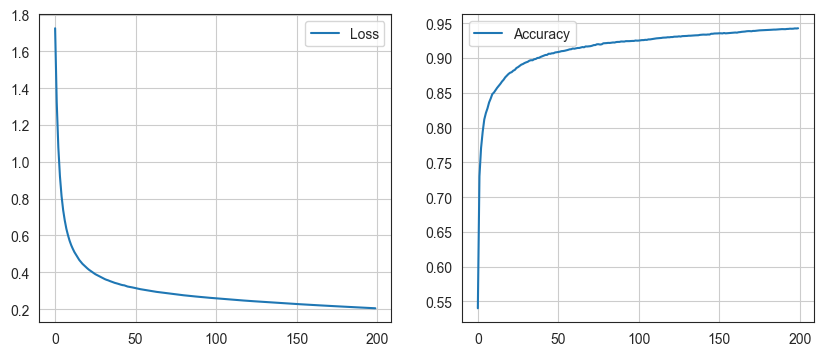

loss 0.6020 - acc 0.815 
loss 0.2495 - acc 0.932 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

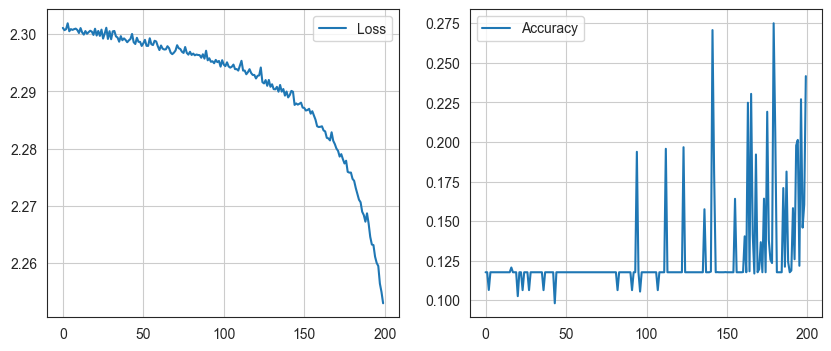

  0%|          | 0/200 [00:00<?, ?it/s]

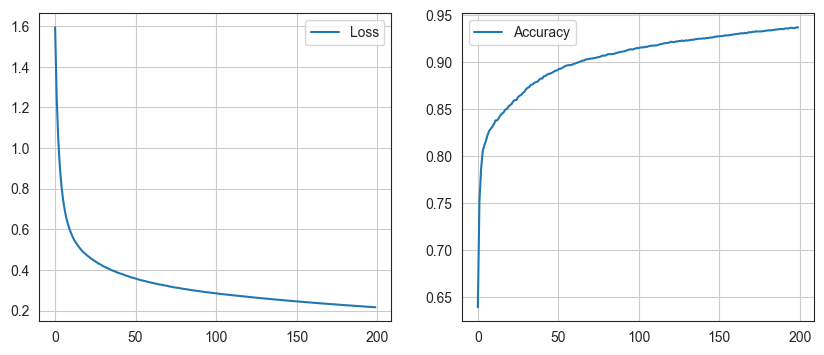

loss 2.2533 - acc 0.244 
loss 0.2455 - acc 0.933 


In [14]:
hparams = {
    "n_epochs_RBM": 100,
    "n_epochs_retro": 200,
    "learning_rate": 0.01,
    "batch_size": 100,
}

df_list = []

for n_couches in [2, 3, 4, 5]:
    X_train_small, _, y_train_small, _ = train_test_split(
        X_train, y_train, train_size=10_000
    )

    if n_couches == 2:
        config = [[784, 200], [200, 200], [200, 10]]
    if n_couches == 3:
        config = [[784, 200], [200, 200], [200, 200], [200, 10]]
    if n_couches == 4:
        config = [[784, 200], [200, 200], [200, 200], [200, 200], [200, 10]]
    if n_couches == 5:
        config = [[784, 200], [200, 200], [200, 200], [200, 200], [200, 200], [200, 10]]

    dnn_1 = DNN(config)
    dnn_2 = DNN(config)

    dnn_2.pretrain(
        X_train_small,
        hparams["n_epochs_RBM"],
        hparams["learning_rate"],
        hparams["batch_size"],
        plot=False,
    )

    dnn_1.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    dnn_2.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    loss_1, acc_1 = dnn_1.test(X_test, y_test)
    loss_2, acc_2 = dnn_2.test(X_test, y_test)

    df_list.append(
        {
            "n_couches": n_couches,
            "pretraining": False,
            "loss": loss_1,
            "accuracy": acc_1,
        }
    )
    df_list.append(
        {
            "n_couches": n_couches,
            "pretraining": True,
            "loss": loss_2,
            "accuracy": acc_2,
        }
    )

In [24]:
df = pd.DataFrame(df_list)
df.to_csv("results_1.csv", index=False)
df

,n_couches,pretraining,loss,accuracy
0,2,False,0.324132,0.9035
1,2,True,0.251346,0.9277
2,3,False,0.373405,0.8890
3,3,True,0.249449,0.9302
4,4,False,0.601950,0.8149
5,4,True,0.249483,0.9323
6,5,False,2.253261,0.2441
7,5,True,0.245517,0.9331


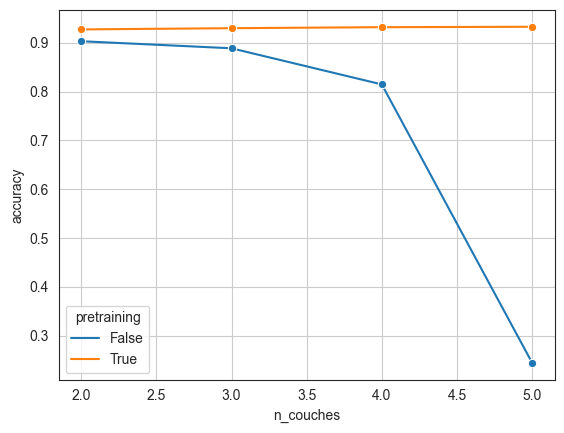

In [25]:
sns.lineplot(df, x="n_couches", y="accuracy", hue="pretraining", marker="o")
plt.grid()
plt.savefig("MNIST_1.pdf", bbox_inches="tight")
plt.show()

## 5.2. Nombre de neurones

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

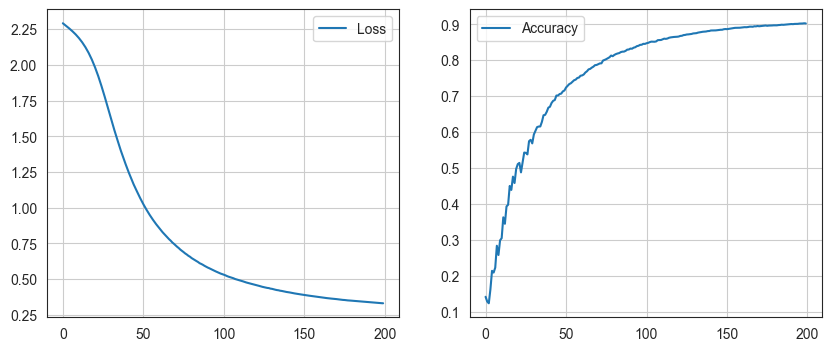

  0%|          | 0/200 [00:00<?, ?it/s]

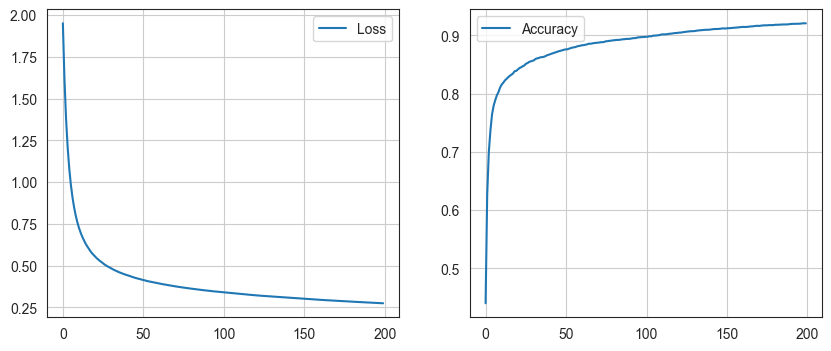

loss 0.3484 - acc 0.895 
loss 0.3024 - acc 0.911 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

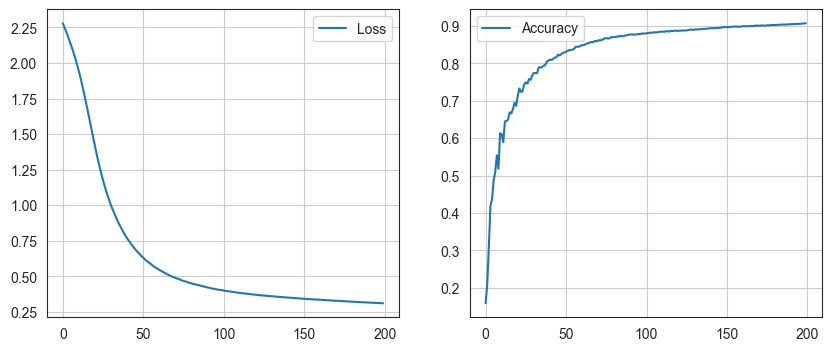

  0%|          | 0/200 [00:00<?, ?it/s]

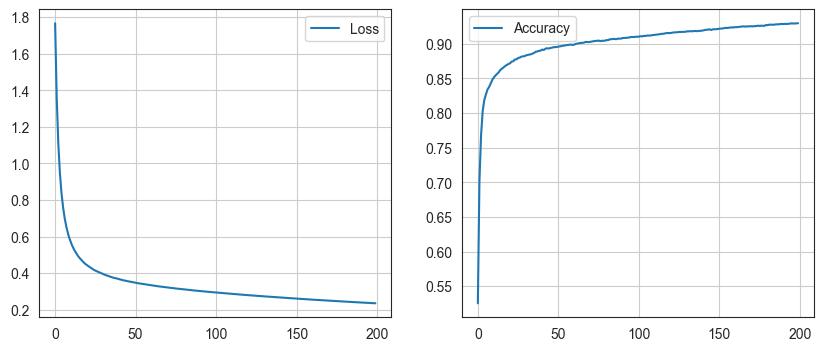

loss 0.3355 - acc 0.900 
loss 0.2554 - acc 0.928 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

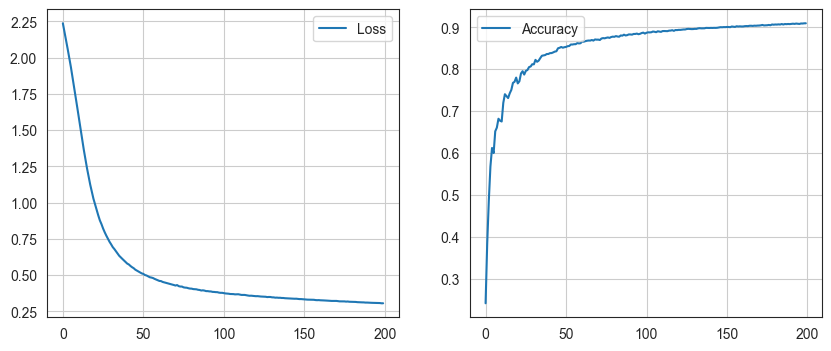

  0%|          | 0/200 [00:00<?, ?it/s]

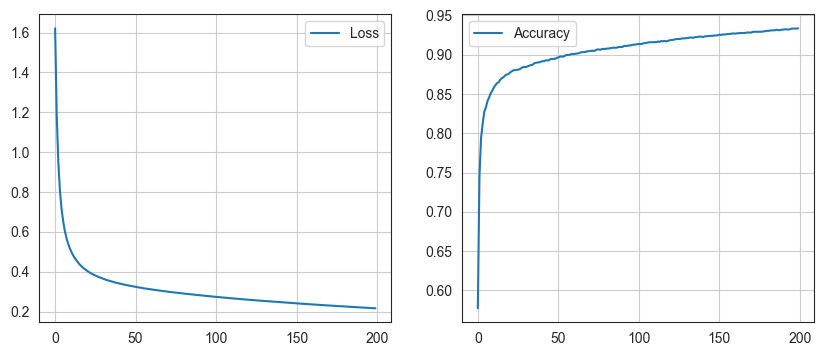

loss 0.3258 - acc 0.905 
loss 0.2328 - acc 0.933 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

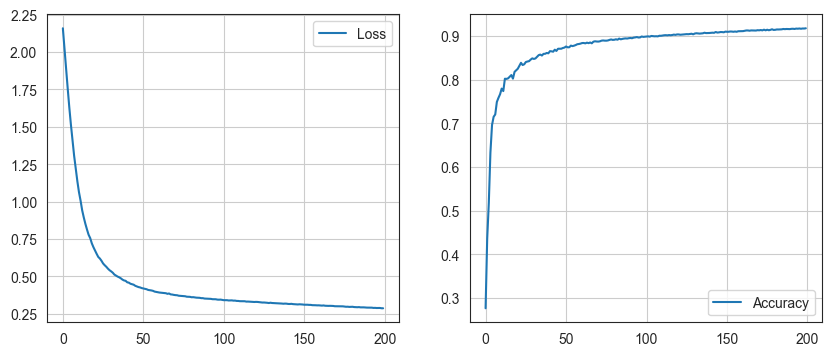

  0%|          | 0/200 [00:00<?, ?it/s]

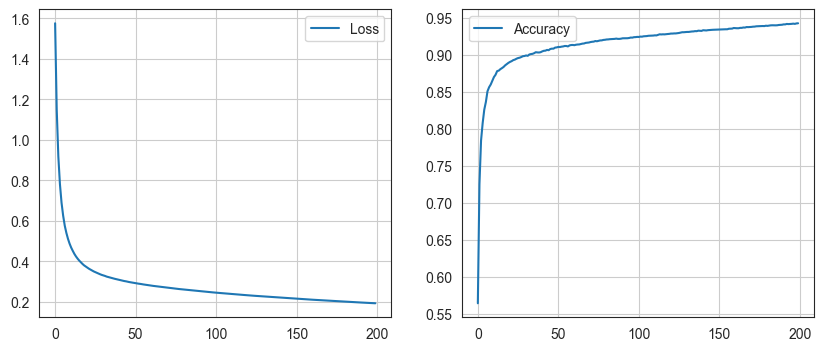

loss 0.3243 - acc 0.909 
loss 0.2156 - acc 0.936 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

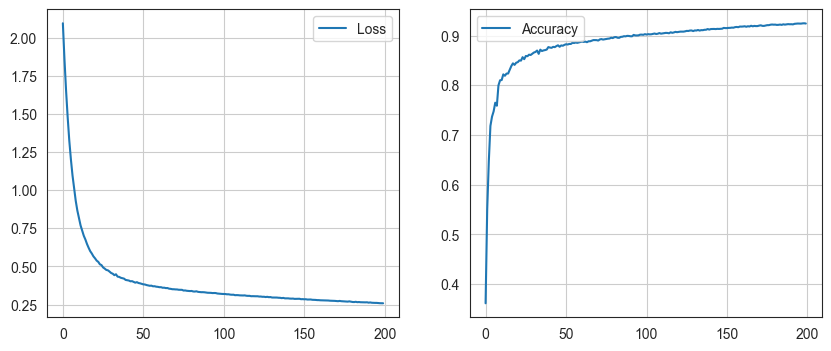

  0%|          | 0/200 [00:00<?, ?it/s]

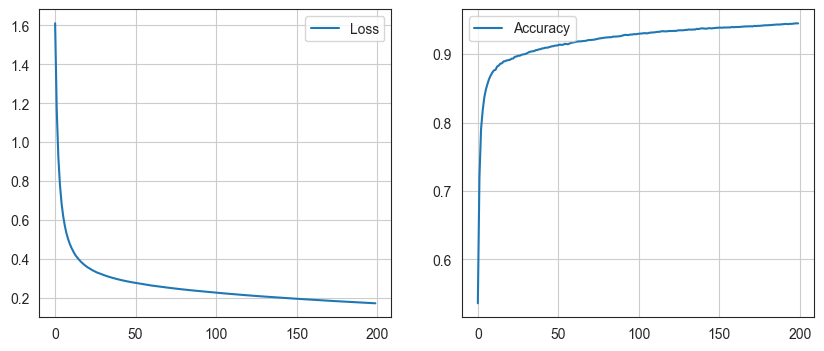

loss 0.3234 - acc 0.910 
loss 0.2165 - acc 0.938 


In [11]:
hparams = {
    "n_epochs_RBM": 100,
    "n_epochs_retro": 200,
    "learning_rate": 0.01,
    "batch_size": 100,
}

df_list = []

for n_neurones in [100, 200, 300, 500, 700]:
    X_train_small, _, y_train_small, _ = train_test_split(
        X_train, y_train, train_size=10_000
    )

    config = [[784, n_neurones], [n_neurones, n_neurones], [n_neurones, 10]]

    dnn_1 = DNN(config)
    dnn_2 = DNN(config)

    dnn_2.pretrain(
        X_train_small,
        hparams["n_epochs_RBM"],
        hparams["learning_rate"],
        hparams["batch_size"],
        plot=False,
    )

    dnn_1.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    dnn_2.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    loss_1, acc_1 = dnn_1.test(X_test, y_test)
    loss_2, acc_2 = dnn_2.test(X_test, y_test)

    df_list.append(
        {
            "n_neurones": n_neurones,
            "pretraining": False,
            "loss": loss_1,
            "accuracy": acc_1,
        }
    )
    df_list.append(
        {
            "n_neurones": n_neurones,
            "pretraining": True,
            "loss": loss_2,
            "accuracy": acc_2,
        }
    )

In [12]:
df = pd.DataFrame(df_list)
df.to_csv("results_2.csv", index=False)
df

,n_neurones,pretraining,loss,accuracy
0,100,False,0.348431,0.8947
1,100,True,0.302442,0.9114
2,200,False,0.335459,0.9002
3,200,True,0.255438,0.9278
4,300,False,0.325848,0.9051
5,300,True,0.232839,0.9333
6,500,False,0.324330,0.9090
7,500,True,0.215621,0.9363
8,700,False,0.323360,0.9103
9,700,True,0.216498,0.9376


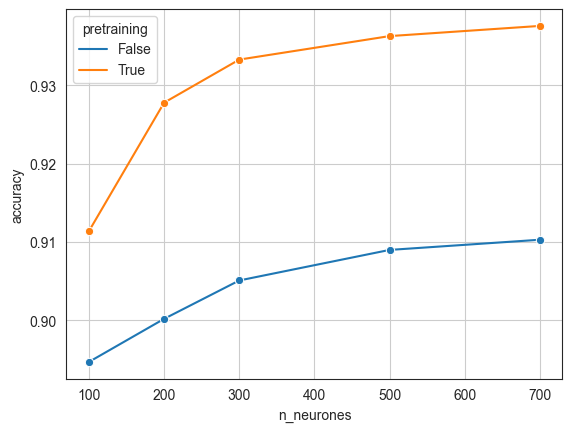

In [13]:
sns.lineplot(df, x="n_neurones", y="accuracy", hue="pretraining", marker="o")
plt.grid()
plt.savefig("MNIST_2.pdf", bbox_inches="tight")
plt.show()

## 5.3. Nombre de données train

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

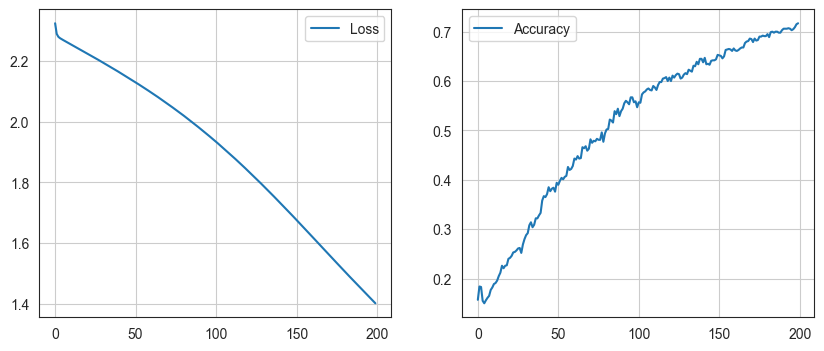

  0%|          | 0/200 [00:00<?, ?it/s]

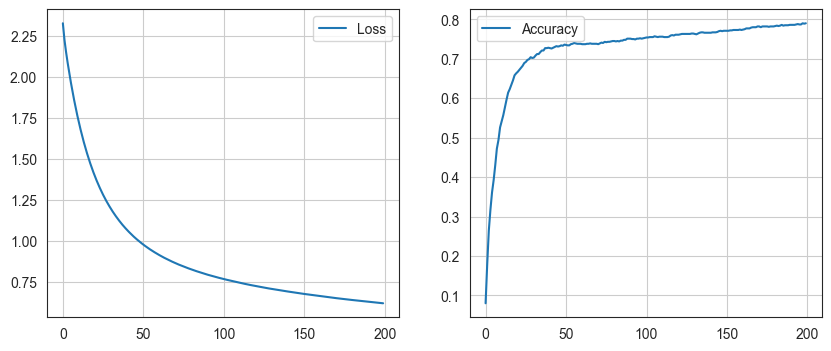

loss 1.4260 - acc 0.703 
loss 0.6585 - acc 0.788 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

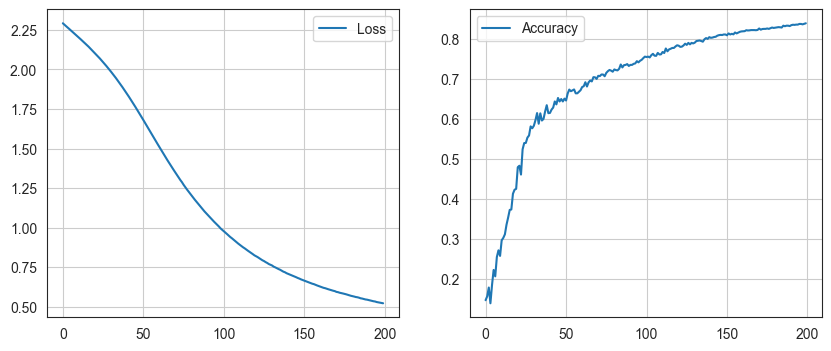

  0%|          | 0/200 [00:00<?, ?it/s]

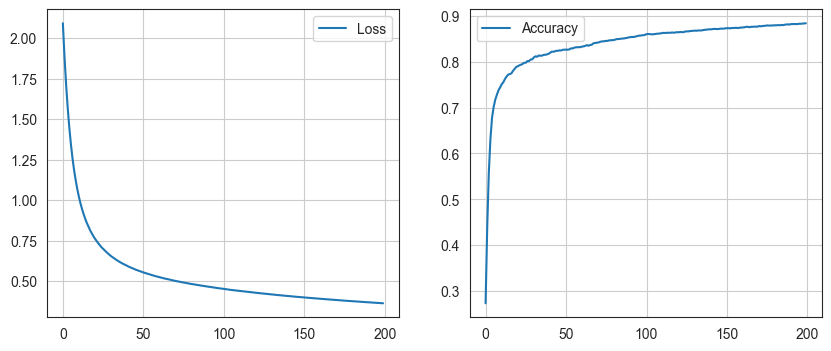

loss 0.5499 - acc 0.834 
loss 0.4029 - acc 0.875 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

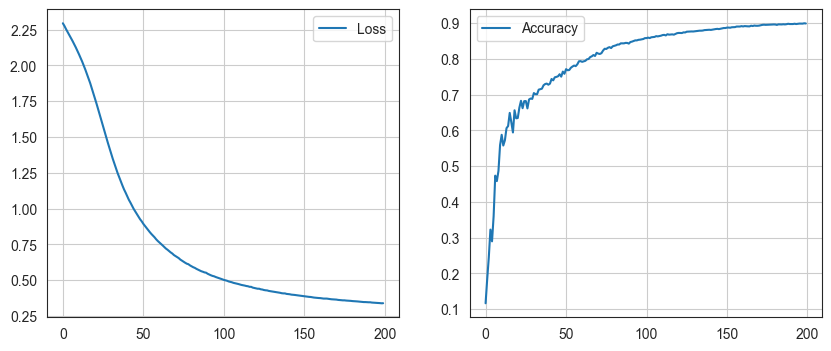

  0%|          | 0/200 [00:00<?, ?it/s]

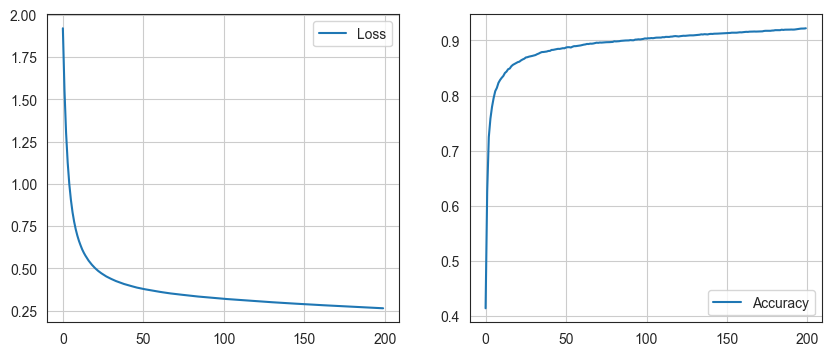

loss 0.3562 - acc 0.892 
loss 0.2898 - acc 0.917 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

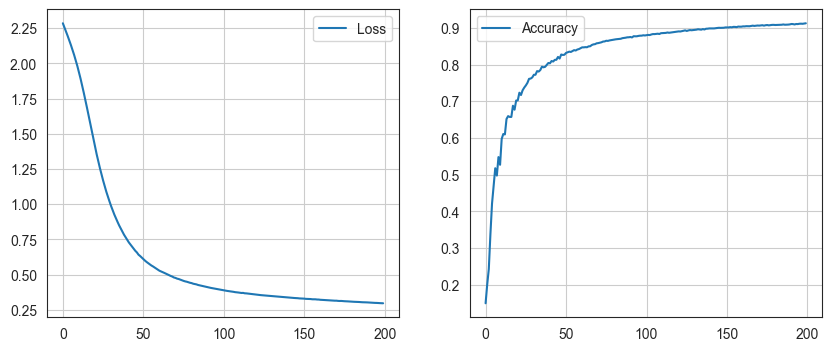

  0%|          | 0/200 [00:00<?, ?it/s]

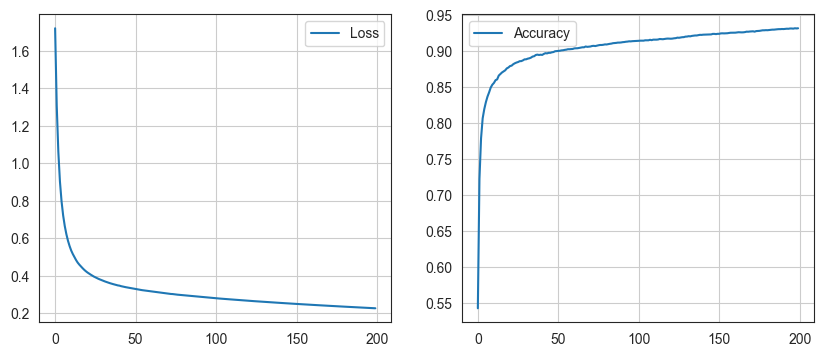

loss 0.3334 - acc 0.902 
loss 0.2612 - acc 0.926 


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

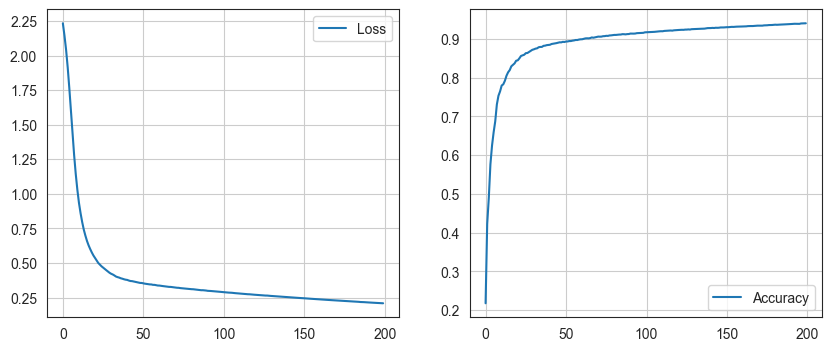

  0%|          | 0/200 [00:00<?, ?it/s]

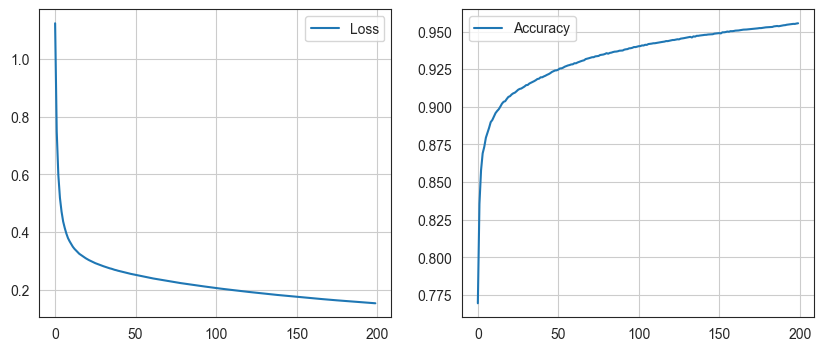

loss 0.2348 - acc 0.935 
loss 0.1757 - acc 0.949 


ValueError: train_size=60000 should be either positive and smaller than the number of samples 60000 or a float in the (0, 1) range

In [6]:
hparams = {
    "n_epochs_RBM": 100,
    "n_epochs_retro": 200,
    "learning_rate": 0.01,
    "batch_size": 100,
}

df_list = []

for train_size in [1_000, 3_000, 7_000, 10_000, 30_000]:
    X_train_small, _, y_train_small, _ = train_test_split(
        X_train, y_train, train_size=train_size
    )

    config = [[784, 200], [200, 200], [200, 10]]

    dnn_1 = DNN(config)
    dnn_2 = DNN(config)

    dnn_2.pretrain(
        X_train_small,
        hparams["n_epochs_RBM"],
        hparams["learning_rate"],
        hparams["batch_size"],
        plot=False,
    )

    dnn_1.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    dnn_2.retropropagation(
        X_train_small,
        y_train_small,
        hparams["n_epochs_retro"],
        hparams["learning_rate"],
        hparams["batch_size"],
    )

    loss_1, acc_1 = dnn_1.test(X_test, y_test)
    loss_2, acc_2 = dnn_2.test(X_test, y_test)

    df_list.append(
        {
            "train_size": train_size,
            "pretraining": False,
            "loss": loss_1,
            "accuracy": acc_1,
        }
    )

    df_list.append(
        {
            "train_size": train_size,
            "pretraining": True,
            "loss": loss_2,
            "accuracy": acc_2,
        }
    )

In [8]:
df = pd.DataFrame(df_list)
df.to_csv("results_3.csv", index=False)
df

,train_size,pretraining,loss,accuracy
0,1000,False,1.425985,0.7027
1,1000,True,0.658483,0.7878
2,3000,False,0.549949,0.8337
3,3000,True,0.402917,0.8747
4,7000,False,0.356248,0.8921
5,7000,True,0.289807,0.9171
6,10000,False,0.333356,0.9021
7,10000,True,0.261214,0.9259
8,30000,False,0.234797,0.9349
9,30000,True,0.175669,0.9486


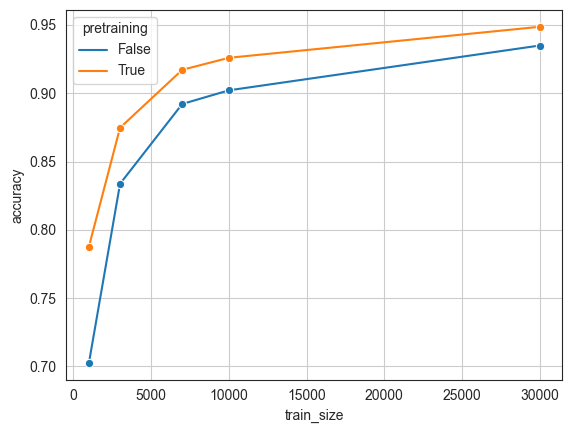

In [9]:
sns.lineplot(df, x="train_size", y="accuracy", hue="pretraining", marker="o")
plt.grid()
plt.savefig("MNIST_3.pdf", bbox_inches="tight")
plt.show()